**Step 1 : Importing Libraries**

In [286]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
import os


**Step 2 : Data Importing & Analysis**

In [287]:
data_df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [288]:
data_df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [289]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


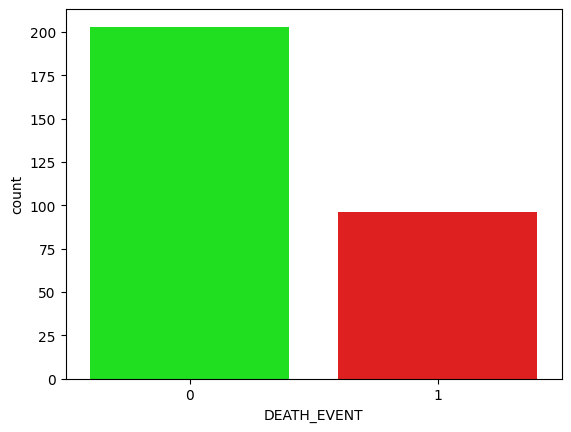

In [290]:
cols = ["#00FF00","#FF0000"]
ax = sns.countplot(x="DEATH_EVENT",data=data_df,palette=cols)
plt.show()

In [291]:
data_df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

<Axes: >

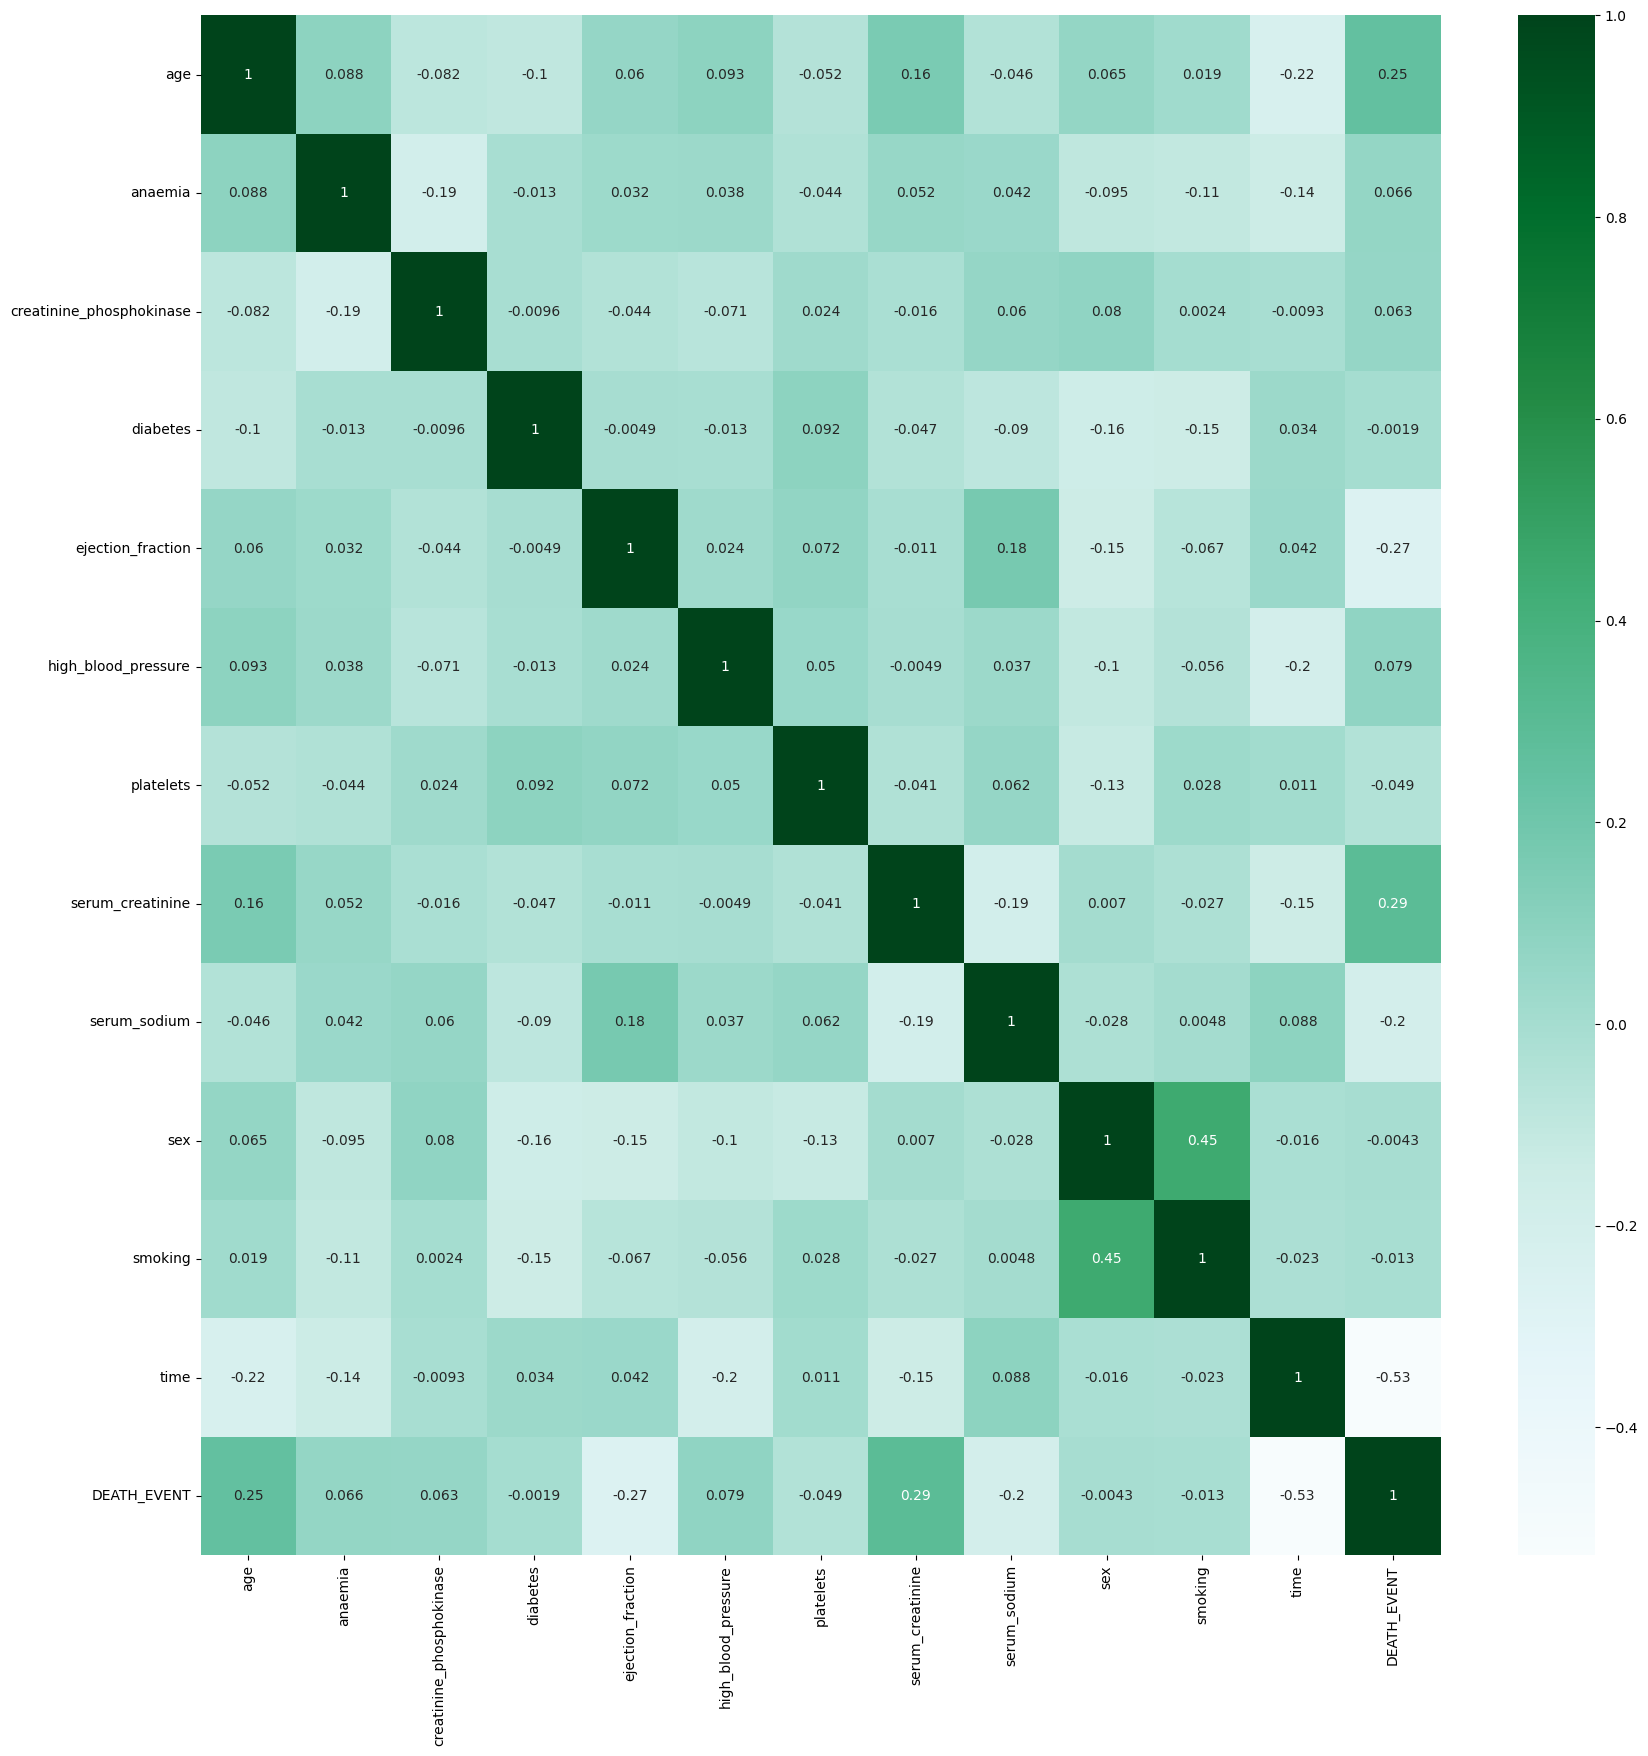

In [292]:
plt.figure(figsize=(20,20))
sns.heatmap(data_df.corr(),annot=True, cmap = "BuGn")

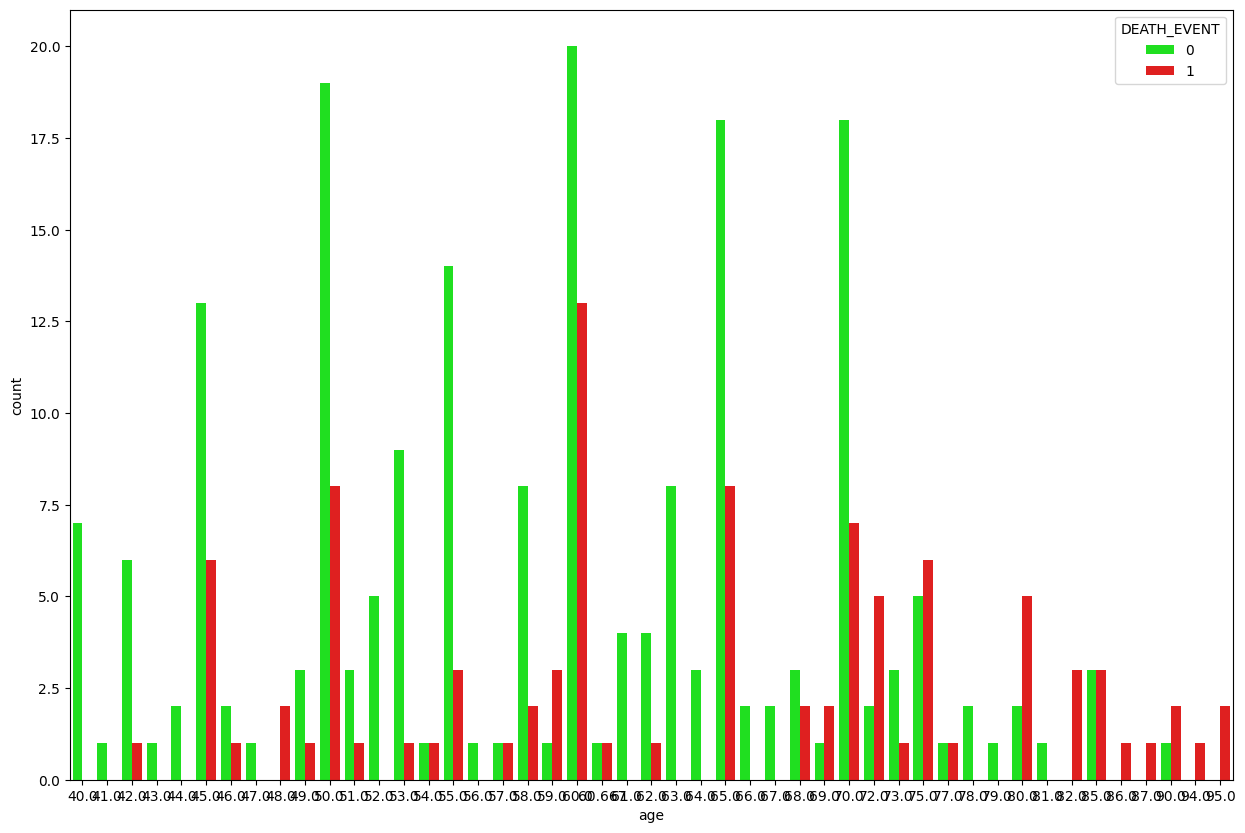

In [293]:
plt.figure(figsize=(15, 10))
days_of_week = sns.countplot(x=data_df['age'], data=data_df, hue="DEATH_EVENT",palette = cols)

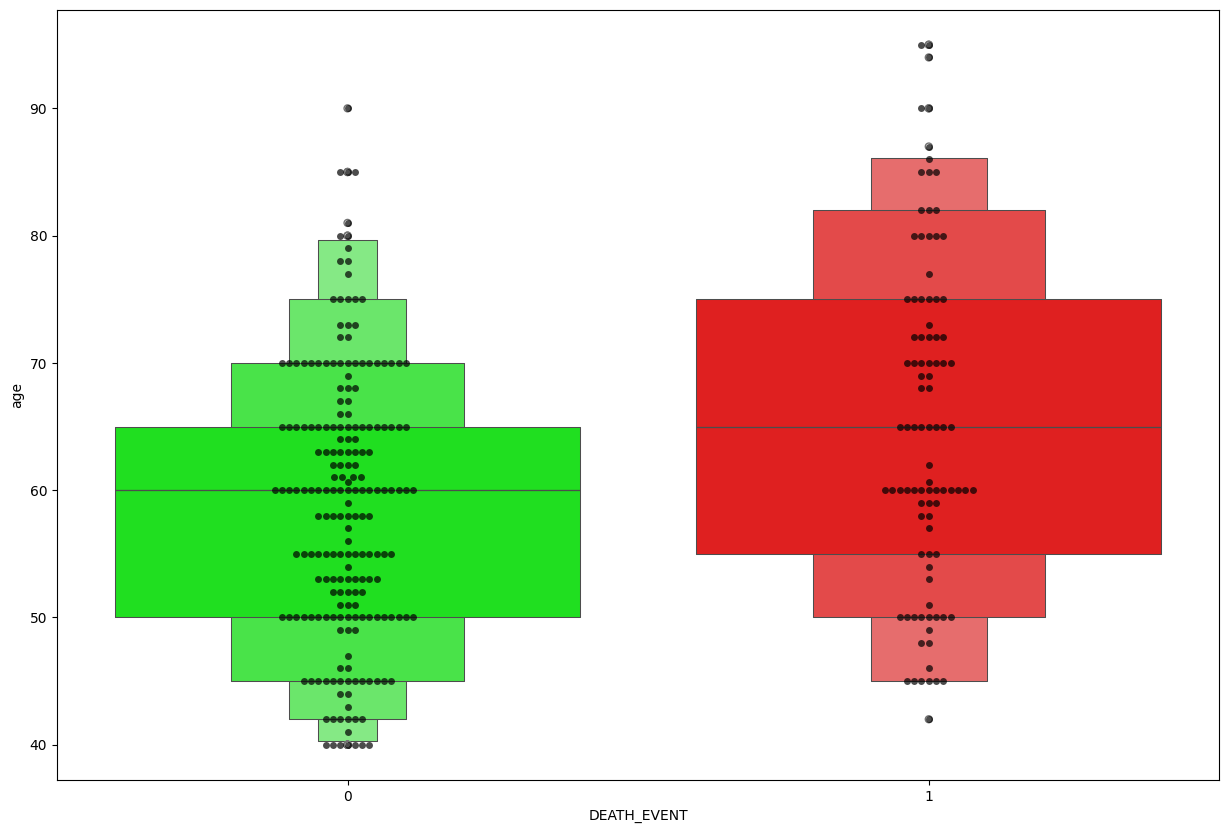

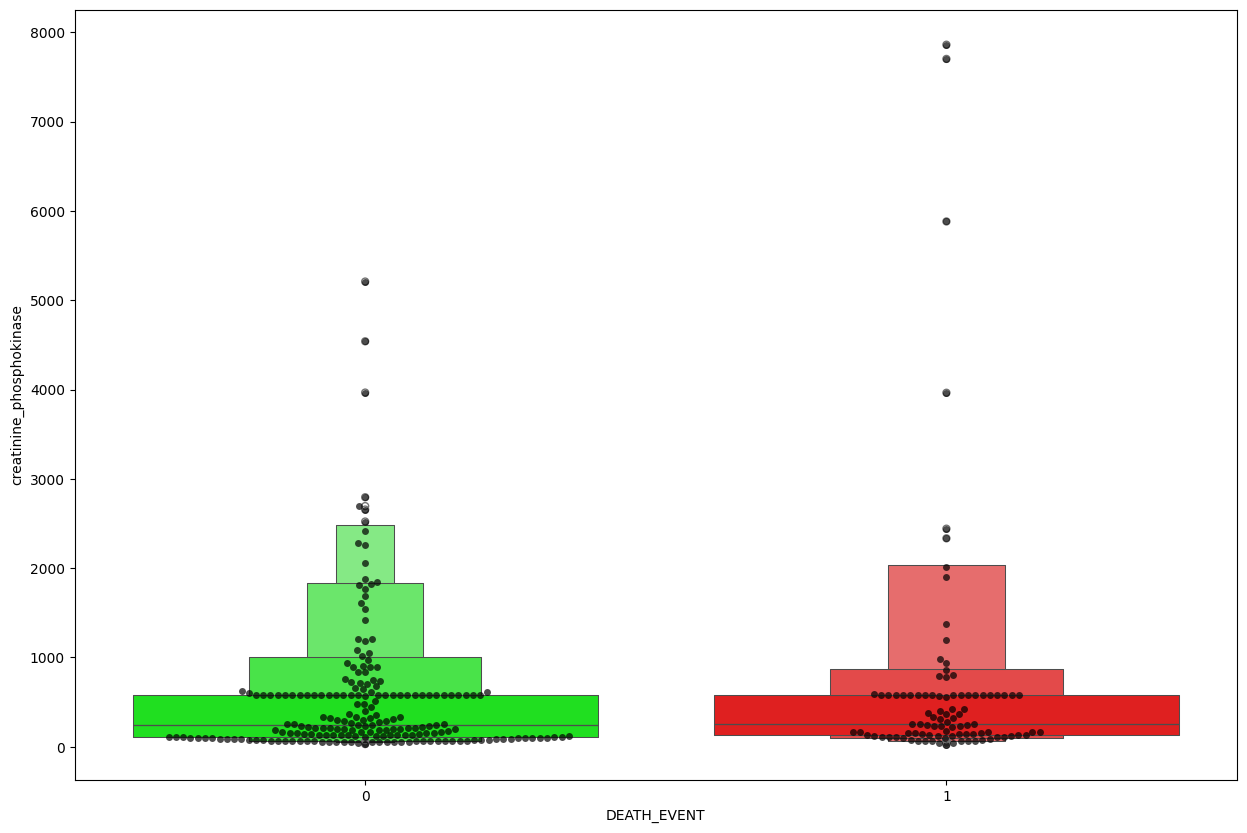

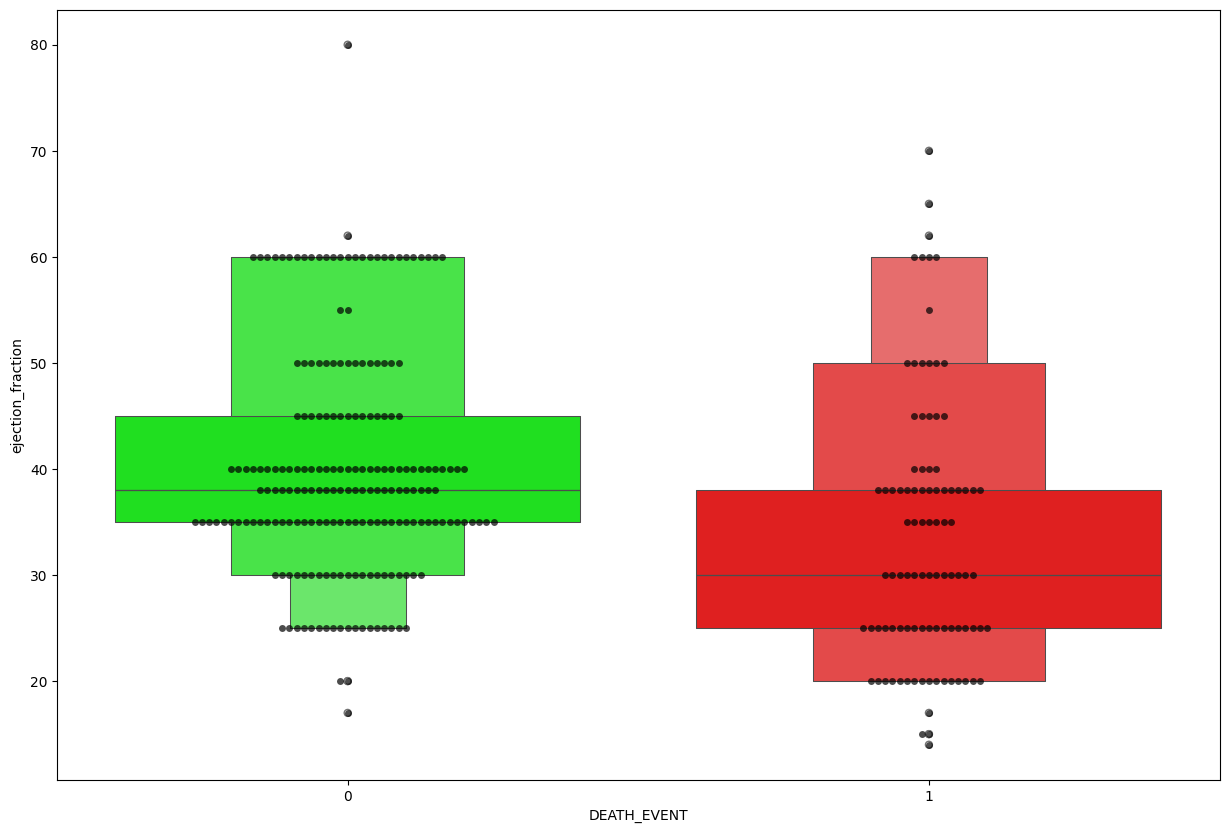

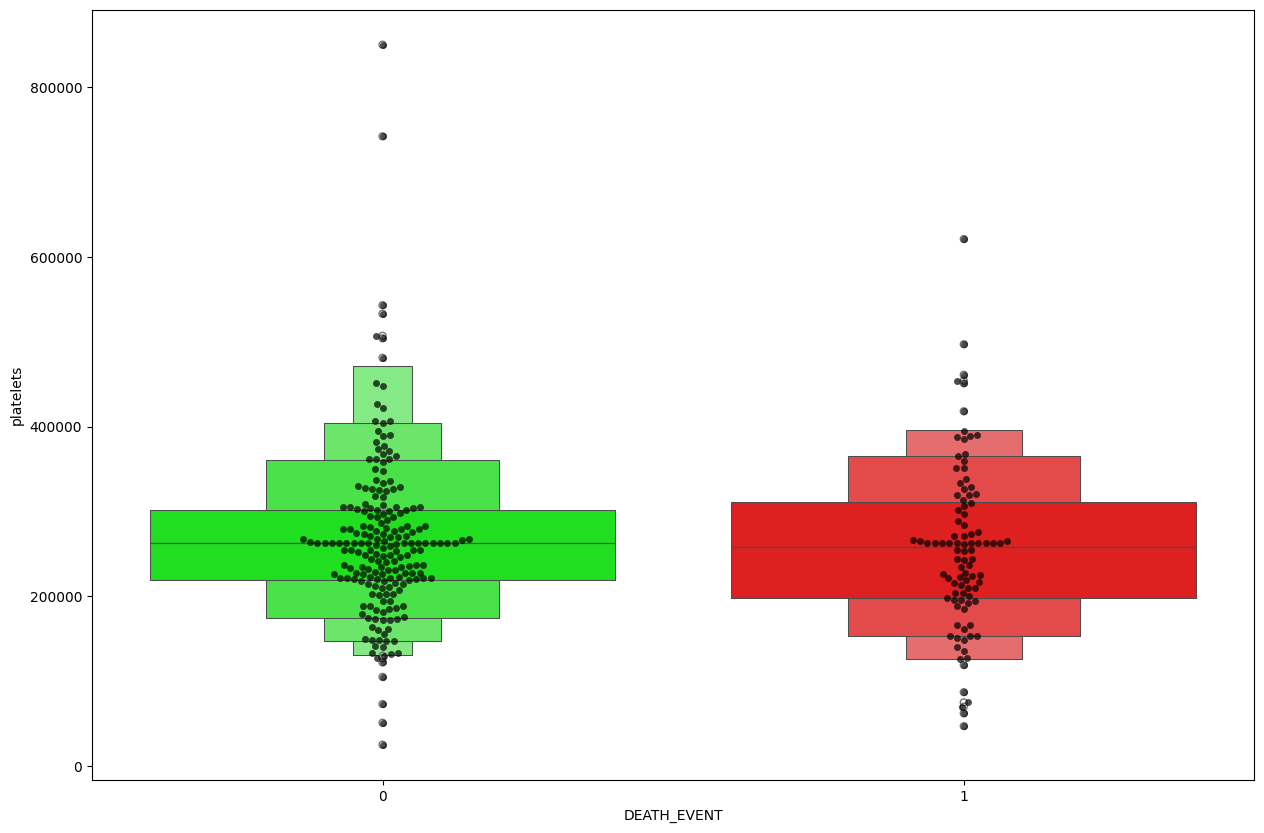

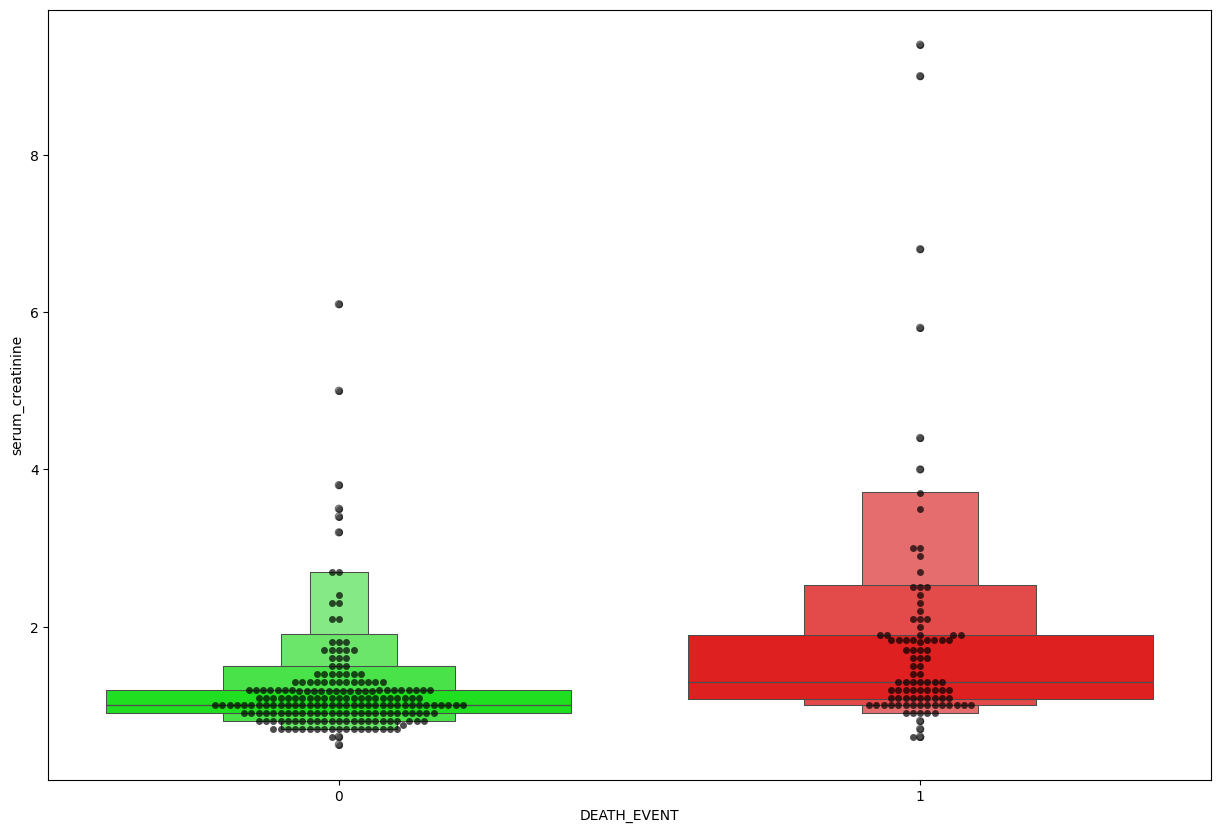

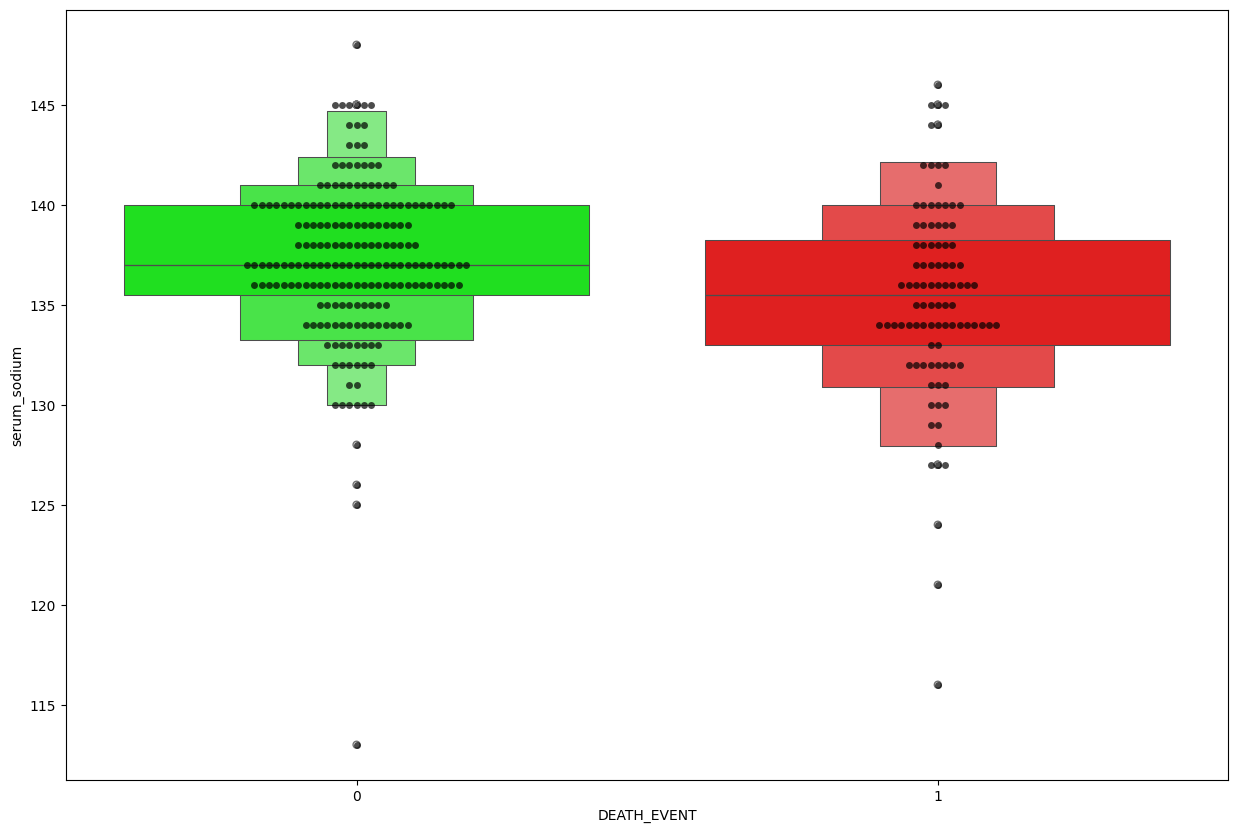

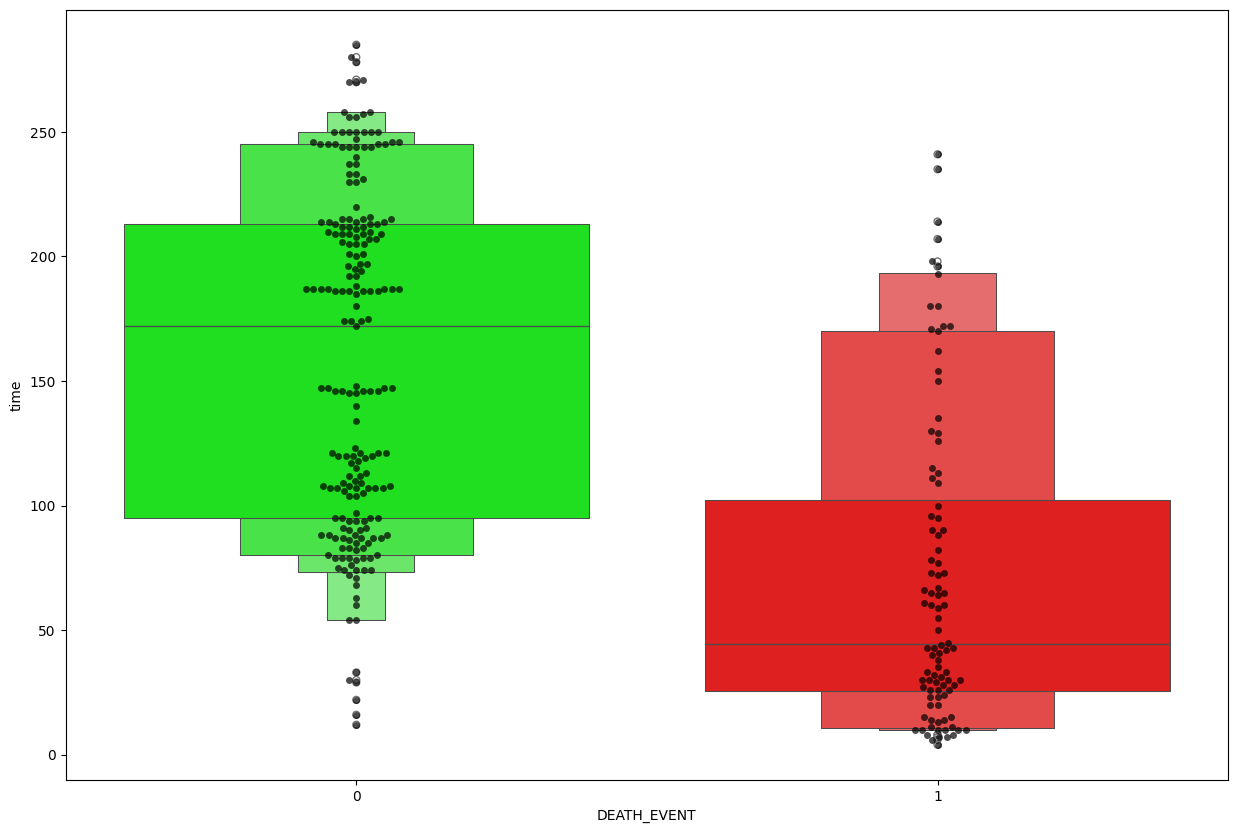

In [294]:
feature =["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for i in feature:
  plt.figure(figsize=(15, 10))
  sns.swarmplot(x="DEATH_EVENT", y=i, data=data_df,color = "black",alpha = 0.7)
  sns.boxenplot(x="DEATH_EVENT", y=i, data=data_df, palette=cols)

**Step 3 : Data Preprocessing**

In [295]:
print(data_df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [296]:
print(data_df["DEATH_EVENT"].value_counts())
print(data_df["DEATH_EVENT"].unique())

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64
[1 0]


In [297]:
X = data_df.drop("DEATH_EVENT", axis=1)
y = data_df["DEATH_EVENT"]

In [298]:
col_name = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=col_name)

In [299]:
X_scaled.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0

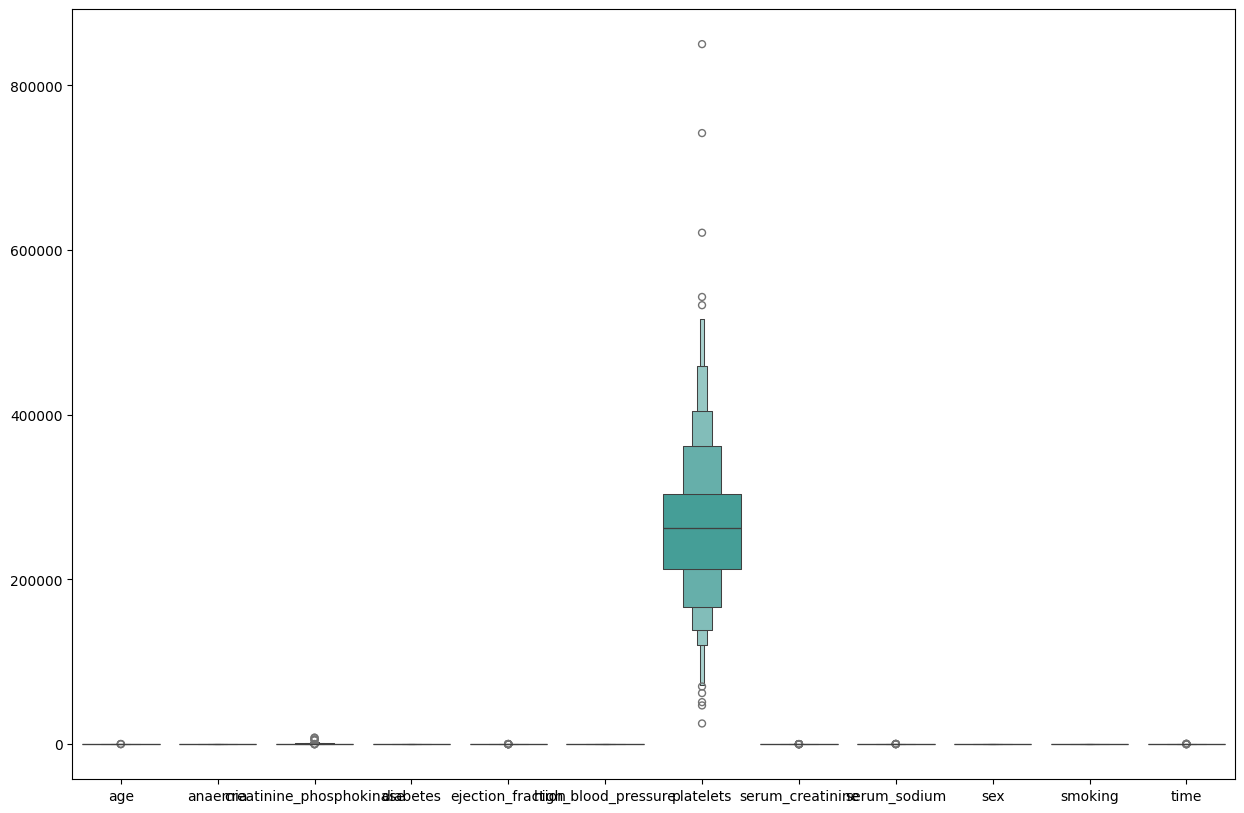

In [300]:
plt.figure(figsize=(15,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [301]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (239, 12)
y_train: (239,)
X_test: (60, 12)
y_test: (60,)


In [305]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
if X_train.size == 0 or y_train.size == 0:
    raise ValueError("X_train or y_train is empty after transformation. Check your data and selector.")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Type of X_train:", X_train.dtype)
print("Type of y_train:", y_train.dtype)


Shape of X_train: (209, 12)
Shape of y_train: (209,)
Type of X_train: float64
Type of y_train: int64


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

**Step 4: Model Building**

**1. SVM**

In [308]:
model1 = svm.SVC()

In [309]:
model1.fit(X_train, y_train)

SVC()

In [310]:
y_pred = model1.predict(X_test)

In [311]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [312]:
y_test

234    0
185    1
145    0
181    1
209    0
      ..
90     0
132    0
274    0
259    0
205    0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [313]:
y_train

64     0
281    0
36     1
293    0
195    1
      ..
70     0
16     1
129    0
92     0
207    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [314]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        64
           1       0.00      0.00      0.00        26

    accuracy                           0.71        90
   macro avg       0.36      0.50      0.42        90
weighted avg       0.51      0.71      0.59        90



**2. ANN**

In [315]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [316]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [317]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [319]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.2753 - loss: 3.2948 - val_accuracy: 0.4528 - val_loss: 0.8131
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2850 - loss: 0.9335 - val_accuracy: 0.5472 - val_loss: 0.6913
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6578 - loss: 0.6846 - val_accuracy: 0.5472 - val_loss: 0.6923
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5678 - loss: 0.6565 - val_accuracy: 0.5472 - val_loss: 0.7181
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6906 - loss: 0.6348 - val_accuracy: 0.5472 - val_loss: 0.7466
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7483 - loss: 0.6096 - val_accuracy: 0.5472 - val_loss: 0.7161
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6889 - loss: 0.6268 - val_accuracy: 0.5472 - val_loss: 0.7110
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6818 - loss: 0.6486 - val_accuracy: 0.5472 - val_loss:

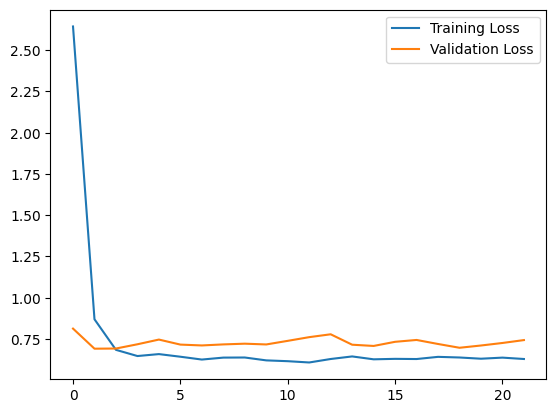

In [320]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

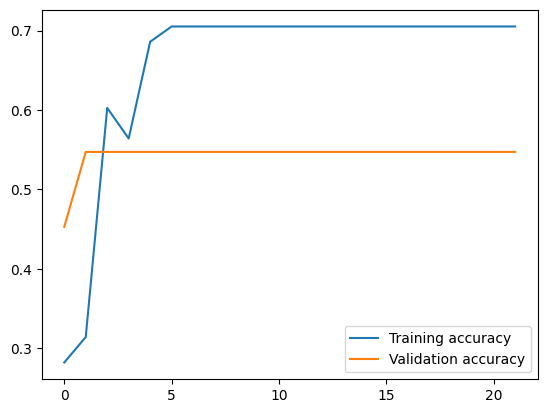

In [321]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='Training accuracy')
plt.plot(history_df['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [322]:
y_pred = model.predict(X_test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [323]:
y_pred = (y_pred > 0.5)

In [324]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        64
           1       0.00      0.00      0.00        26

    accuracy                           0.71        90
   macro avg       0.36      0.50      0.42        90
weighted avg       0.51      0.71      0.59        90



In [325]:
selector = SelectKBest(score_func=f_classif, k=12)
X_selected = selector.fit_transform(X, y)


anova_scores = selector.scores_


feature_scores = pd.DataFrame({"Feature": X.columns, "ANOVA F-score": anova_scores})
feature_scores = feature_scores.sort_values(by="ANOVA F-score", ascending=False)
print("ANOVA F-scores:")
print(feature_scores)

ANOVA F-scores:
                     Feature  ANOVA F-score
11                      time     114.181264
7           serum_creatinine      28.158492
4          ejection_fraction      23.094063
0                        age      20.435946
8               serum_sodium      11.765331
5        high_blood_pressure       1.881937
1                    anaemia       1.310096
2   creatinine_phosphokinase       1.173259
6                  platelets       0.718880
10                   smoking       0.047333
9                        sex       0.005534
3                   diabetes       0.001121


In [326]:
selector = SelectKBest(score_func=f_classif, k=12)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

X_scaled = s_scaler.fit_transform(X_selected_df)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected_df.columns)

In [327]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [328]:
col_name = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)

In [329]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [330]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [331]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

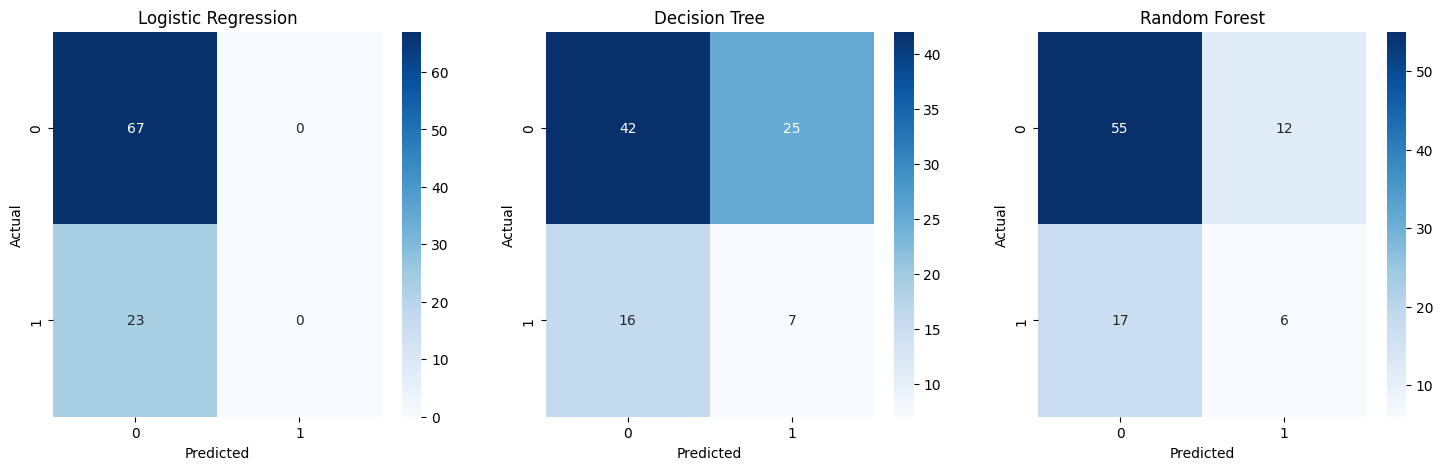

In [332]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [("Logistic Regression", y_pred_log), ("Decision Tree", y_pred_dt), ("Random Forest", y_pred_rf)]
for i, (title, y_pred) in enumerate(models):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.show()

In [333]:
param_grid_log = {"C": [0.01, 0.1, 1, 10]}
gs_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5)
gs_log.fit(X_train_scaled, y_train)
best_log_model = gs_log.best_estimator_
print("Best Logistic Regression Params:", gs_log.best_params_)

Best Logistic Regression Params: {'C': 1}


In [334]:
param_grid_dt = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
gs_dt.fit(X_train, y_train)
best_dt_model = gs_dt.best_estimator_
print("Best Decision Tree Params:", gs_dt.best_params_)

Best Decision Tree Params: {'max_depth': 3, 'min_samples_split': 2}


In [335]:
param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, None]}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
gs_rf.fit(X_train, y_train)
best_rf_model = gs_rf.best_estimator_
print("Best Random Forest Params:", gs_rf.best_params_)

Best Random Forest Params: {'max_depth': 3, 'n_estimators': 200}


In [336]:
models = {"Logistic Regression": best_log_model, "Decision Tree": best_dt_model, "Random Forest": best_rf_model}
best_model_name = None
best_model = None
best_score = 0

print("Cross-validation Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    print(f"{name}: Mean={mean_score:.4f}, Std={scores.std():.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        best_model = model

Cross-validation Scores:
Logistic Regression: Mean=0.6080, Std=0.0466
Decision Tree: Mean=0.6075, Std=0.0520
Random Forest: Mean=0.6411, Std=0.0155


In [337]:
print(f"Best Model: {best_model_name} with Score: {best_score:.4f}")

Best Model: Random Forest with Score: 0.6411


In [338]:
y_pred_best = best_model.predict(X_test)

In [339]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})
predictions.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
